# Quartz fertility analysis of mixing scenarios associated with the Mataquito River
##### This notebook calculates fertilites of quartz based on the erosion rates and their associated uncertainties using a monte carlo simulation of 100,000 samplings

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show

Hillshade loaded successfully


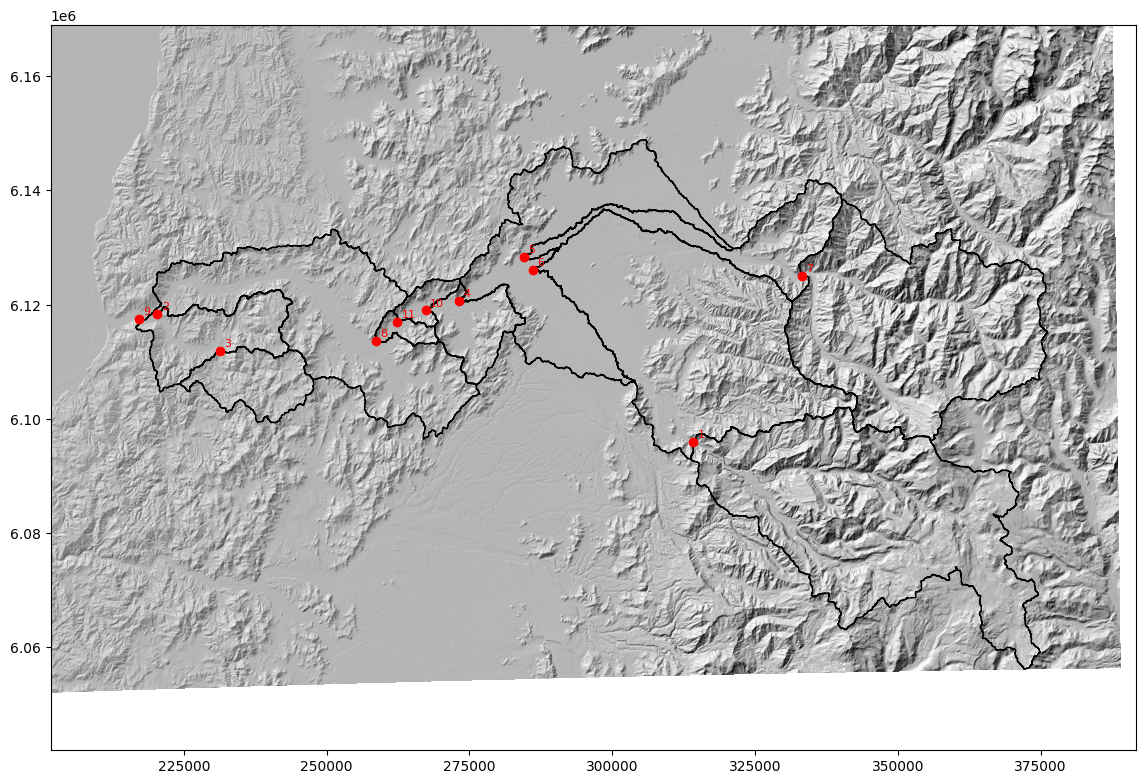

In [2]:
# loading in reference figure of samples
# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Set bounds based on your coordinates
x_coords = [201707, 391646, 286002, 307351]
y_coords = [6117461, 6095743, 6042001, 6168995]
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# load samples
samples = '/Users/Glong1/Desktop/Andes/Andes_watersheds/MataquitoRiver/mataquitosamplepoints_corrected_for_flow_30mDEM.shp'
samples_gdf = gpd.read_file(samples)
samples_gdf.plot(ax=ax, color='red', zorder=1000)
# Add ID labels to each point
for idx, row in samples_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    label = row['id']
    ax.annotate(str(label), (x, y), xytext=(3, 3), textcoords='offset points', 
                fontsize=8, ha='left', color='red', zorder=1000)

# Load and display hillshade
hillshade_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/MataquitoRiver/30DEMwatersheddata/Hillshade30m.tif'
with rasterio.open(hillshade_path) as src:
    show(src, ax=ax, cmap='gray', alpha=1.0)
print("Hillshade loaded successfully")

"""# load dem
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/MataquitoRiver/30DEMwatersheddata/dem_utm30m.tif'
with rasterio.open(dem_path) as src:
    show(src, ax=ax, cmap='gray', alpha=1.0)
print("dem loaded successfully")"""

# Load and overlay the watershed boundary
watershed_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/MataquitoRiver/30DEMwatersheddata/mergedsubwatersheds.shp'
watershed_gdf = gpd.read_file(watershed_path)
watershed_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

plt.show()

In [3]:
# Load your Excel file into a DataFrame 
df = pd.read_excel('/Users/Glong1/Desktop/Andes/AndesTG/Mataquito/MataquitoSampleData.xlsx') 

# Print the DataFrame to display its contents
print(df)

   Sample_ID Sample_Type   Latitude  Longitude  Source_Area  Elevation  \
0       CT-1  river sand -35.261470 -71.042330       1384.9        550   
1       CT-2  river sand -35.038830 -72.067050       5762.5         11   
2       CT-3  river sand -35.100380 -71.946720        189.4         18   
3       CT-4  river sand -35.027690 -71.487020       4706.3        111   
4       CT-5  river sand -34.962640 -71.359940       1495.6        155   
5       CT-6  river sand -34.984880 -71.342700       2573.1        158   
6       CT-7  river sand -35.003550 -70.827530       1207.5        631   
7       CT-8  river sand -35.092222 -71.647745       4947.6         78   
8       CT-9  river sand -35.046389 -72.101111       6199.4          9   
9      CT-10  river sand -35.049444 -71.550000       4882.0        102   
10     CT-11  river sand -35.064167 -71.610278       4932.1         89   

    Virtual_Elevation  Surface_Production_Rate  Shielding_Factor  Quartz  \
0             2261.20              

In [4]:
# set random seed for reproducibility 
np.random.seed(17)

In [5]:
# config random sampling
number_samples = 100000

In [14]:
np.random.seed(17)
# Creating erosion rate samples for all samples sites
print("Modeled Erosion Rates based on monte carlo simulations")

# CT-1 erosion rate and uncertainty
CT_1_samples = np.random.normal(df.loc[0, 'Erosion_rate'], 
                                df.loc[0, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-1: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_1_samples), np.std(CT_1_samples)))

# CT-2 erosion rate and uncertainty
CT_2_samples = np.random.normal(df.loc[1, 'Erosion_rate'],
                                df.loc[1, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-2: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_2_samples), np.std(CT_2_samples)))

# CT-3 erosion rate and uncertainty
CT_3_samples = np.random.normal(df.loc[2, 'Erosion_rate'], 
                                df.loc[2, 'Erosion_rate_uncertainty_external'],
                                number_samples)
print("CT-3: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples), np.std(CT_3_samples)))

# CT-4 erosion rate and uncertainty
CT_4_samples = np.random.normal(df.loc[3, 'Erosion_rate'], 
                                df.loc[3, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-4: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_4_samples), np.std(CT_4_samples)))

# CT-5 erosion rate and uncertainty
CT_5_samples = np.random.normal(df.loc[4, 'Erosion_rate'], 
                                df.loc[4, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-5: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples), np.std(CT_5_samples)))

# CT-6 erosion rate and uncertainty
CT_6_samples = np.random.normal(df.loc[5, 'Erosion_rate'], 
                                df.loc[5, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-6: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples), np.std(CT_6_samples)))

# CT-7 erosion rate and uncertainty
CT_7_samples = np.random.normal(df.loc[6, 'Erosion_rate'], 
                                df.loc[6, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-7: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_7_samples), np.std(CT_7_samples)))

# CT-8 erosion rate and uncertainty
CT_8_samples = np.random.normal(df.loc[7, 'Erosion_rate'], 
                                df.loc[7, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-8: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_8_samples), np.std(CT_8_samples)))

# CT-9 erosion rate and uncertainty
CT_9_samples = np.random.normal(df.loc[8, 'Erosion_rate'], 
                                df.loc[8, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-9: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_9_samples), np.std(CT_9_samples)))

# CT-10 erosion rate and uncertainty
CT_10_samples = np.random.normal(df.loc[9, 'Erosion_rate'], 
                                df.loc[9, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-10: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_10_samples), np.std(CT_10_samples)))

# CT-11 erosion rate and uncertainty
CT_11_samples = np.random.normal(df.loc[10, 'Erosion_rate'], 
                                df.loc[10, 'Erosion_rate_uncertainty_external'], 
                                number_samples)
print("CT-11: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_11_samples), np.std(CT_11_samples)))


Modeled Erosion Rates based on monte carlo simulations
CT-1: 22.8970 ± 1.8595
CT-2: 94.8280 ± 7.7192
CT-3: 29.5005 ± 2.4127
CT-4: 29.6065 ± 2.4398
CT-5: 387.0293 ± 31.8875
CT-6: 29.8014 ± 2.4379
CT-7: 532.1582 ± 51.9161
CT-8: 262.9688 ± 22.8529
CT-9: 104.9959 ± 8.5575
CT-10: 245.8567 ± 21.3102
CT-11: 286.0604 ± 24.5662


Success Fraction of Samples: 0.2101
Modeled Erosion Rates based on monte carlo simulations flux ordered
CT-7: 475.4300 ± 37.1243
CT-5: 413.5071 ± 27.1468
CT-7, CT-5 correlation: 0.6242


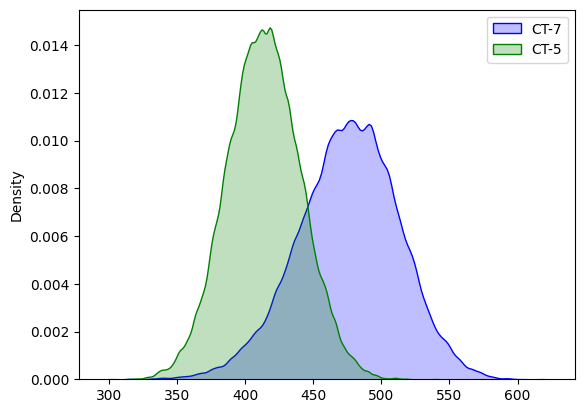

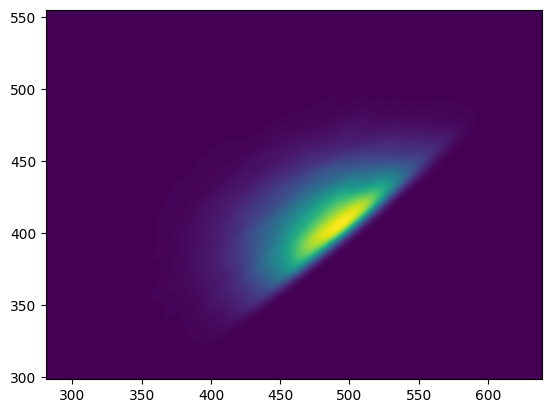

In [15]:
np.random.seed(17)
# Flux ordering CT-7 and CT-5:
flux_7 = df.loc[6, 'Source_Area'] * CT_7_samples
flux_5 = df.loc[4, 'Source_Area'] * CT_5_samples
i1 = np.where(flux_5 > flux_7)

plt.figure()
sns.kdeplot(CT_7_samples[i1], bw_adjust=.5, fill=True, color="blue", label="CT-7")
sns.kdeplot(CT_5_samples[i1], bw_adjust=.5, fill=True, color="green", label="CT-5")
plt.legend()

plt.figure()
sns.kdeplot(x=CT_7_samples[i1], y=CT_5_samples[i1], fill=True, thresh=0, levels=100, cmap="viridis")

print("Success Fraction of Samples: {0:6.4f}".format(i1[0].size / number_samples))
print("Modeled Erosion Rates based on monte carlo simulations flux ordered")
print("CT-7: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_7_samples[i1]), np.std(CT_7_samples[i1])))
print("CT-5: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples[i1]), np.std(CT_5_samples[i1])))
print("CT-7, CT-5 correlation: {0:6.4f}".format(np.corrcoef(CT_7_samples[i1], CT_5_samples[i1])[0,1]))

Success Fraction of Samples: 1.0000
Modeled Erosion Rates based on monte carlo simulations flux ordered
CT-1: 22.8970 ± 1.8595
CT-6: 29.8014 ± 2.4379
CT-1, CT-6 correlation: 0.0053


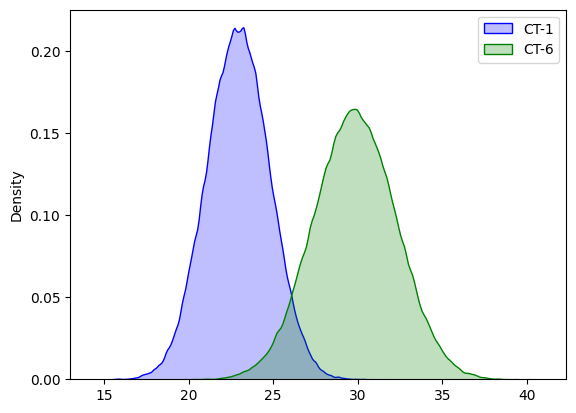

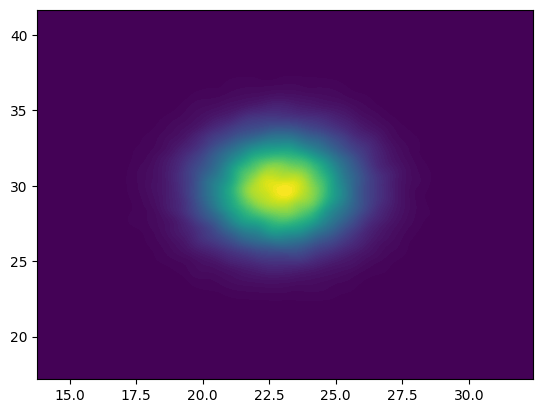

In [16]:
np.random.seed(17)
# Flux ordering CT-1 and CT-6:
flux_1 = df.loc[0, 'Source_Area'] * CT_1_samples
flux_6 = df.loc[5, 'Source_Area'] * CT_6_samples
i2 = np.where(flux_6 > flux_1)

plt.figure()
sns.kdeplot(CT_1_samples[i2], bw_adjust=.5, fill=True, color="blue", label="CT-1")
sns.kdeplot(CT_6_samples[i2], bw_adjust=.5, fill=True, color="green", label="CT-6")
plt.legend()

plt.figure()
sns.kdeplot(x=CT_1_samples[i2], y=CT_6_samples[i2], fill=True, thresh=0, levels=100, cmap="viridis")

print("Success Fraction of Samples: {0:6.4f}".format(i2[0].size / number_samples))
print("Modeled Erosion Rates based on monte carlo simulations flux ordered")
print("CT-1: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_1_samples[i2]), np.std(CT_1_samples[i2])))
print("CT-6: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples[i2]), np.std(CT_6_samples[i2])))
print("CT-1, CT-6 correlation: {0:6.4f}".format(np.corrcoef(CT_1_samples[i2], CT_6_samples[i2])[0,1]))

Modeled Erosion Rates based on monte carlo simulations flux ordered
CT-5: 387.0293 ± 31.8875
CT-6: 29.8014 ± 2.4379
Qb/Qa Fertility Ratio (mean, (25-75% range)): 0.2320 (0.1417 - 0.3081)
Qb/Qa Fertility Ratio (median, (25-75% range)): 0.2197 (0.1417 - 0.3081)
Qa/Qb: 11.8511 (3.2461 - 7.0547)
Qa/Qb: 4.5508 (3.2461 - 7.0547)


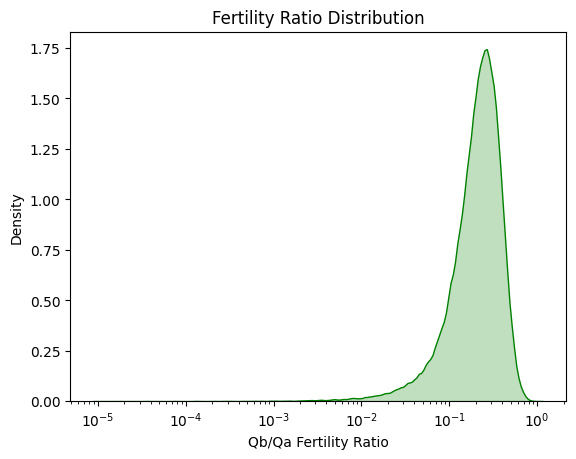

In [17]:
np.random.seed(17)
# Flux ordered using CT-5 and CT-6 to mix and form CT-10 with calculated fertilities.

# CT-5 and CT-6:
flux_7 = df.loc[6, 'Source_Area'] * CT_7_samples
flux_5 = df.loc[4, 'Source_Area'] * CT_5_samples
i3 = np.where(flux_5 > flux_7)
CT_5_ordered = CT_5_samples[i3]

flux_1 = df.loc[0, 'Source_Area'] * CT_1_samples
flux_6 = df.loc[5, 'Source_Area'] * CT_6_samples
i4 = np.where(flux_6 > flux_1)
CT_6_ordered = CT_6_samples[i4]

CT_5_resampled = np.random.choice(CT_5_ordered, size=number_samples, replace=True)
CT_6_resampled = np.random.choice(CT_6_ordered, size=number_samples, replace=True)

print("Modeled Erosion Rates based on monte carlo simulations flux ordered")
print("CT-5: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples), np.std(CT_5_samples)))
print("CT-6: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples), np.std(CT_6_samples)))

# Calculating the fertilities for 5, 6 to 10
A_a = df.loc[4, 'Source_Area']          # CT-5 source area
P_a = df.loc[4, 'Surface_Production_Rate']  # CT-5 production rate
E_a = CT_5_samples

A_b = df.loc[5, 'Source_Area']          # CT-6 source area
P_b = df.loc[5, 'Surface_Production_Rate']  # CT-6 production rate
E_b = CT_6_samples

A_c = df.loc[9, 'Source_Area']          # CT-10 source area
P_c = df.loc[9, 'Surface_Production_Rate']  # CT-10 production rate
E_c = CT_10_samples

Q = (P_c * E_a * A_a - P_a * E_c * A_a) / (P_b * E_c * A_b - P_c * E_b * A_b)
Qi = (P_b * E_c * A_b - P_c * E_b * A_b) / (P_c * E_a * A_a - P_a * E_c * A_a)
i_f2 = np.where(Q > 0)
i_f3 = np.where(Qi > 0)

plt.figure()
sns.kdeplot(Q[i_f2], bw_adjust=.5, fill=True, color="green", log_scale=True)
plt.xlabel("Qb/Qa Fertility Ratio")
plt.ylabel("Density")
plt.title("Fertility Ratio Distribution")

print("Qb/Qa Fertility Ratio (mean, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.mean(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))
print("Qb/Qa Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.median(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))

print("Qa/Qb: {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.mean(Qi[i_f3]), np.percentile(Qi[i_f3], 75), np.percentile(Qi[i_f3], 25)))
print("Qa/Qb: {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.median(Qi[i_f3]), np.percentile(Qi[i_f3], 75), np.percentile(Qi[i_f3], 25)))

Modeled Erosion Rates based on monte carlo simulations flux ordered
CT-8 ER: 262.9688 ± 22.8529
CT-3 ER: 29.5005 ± 2.4127
Qb/Qa Fertility Ratio (mean, (25-75% range)): 249.2022 (174.5408 - 287.4053)
Qb/Qa Fertility Ratio (median, (25-75% range)): 222.0487 (174.5408 - 287.4053)


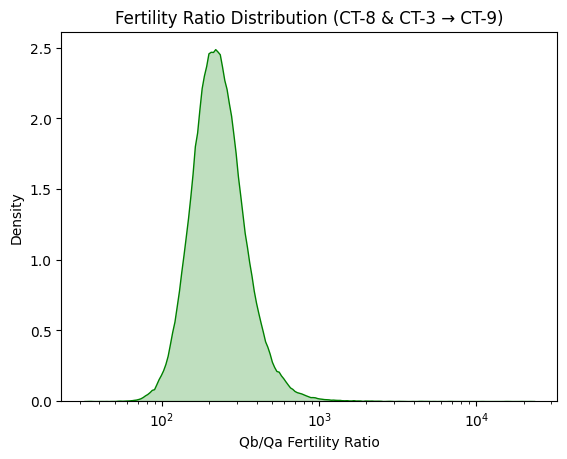

In [18]:
np.random.seed(17)
# Flux ordered using CT-8.2 and CT-3 to mix and form CT-9 with calculated fertilities.

# CT-8.2 and CT-3:
flux_4 = df.loc[3, 'Source_Area'] * CT_4_samples
flux_8 = df.loc[7, 'Source_Area'] * CT_8_samples
i5 = np.where(flux_8 > flux_4)
CT_8_ordered = CT_8_samples[i5]

# CT-3 is independent - no flux ordering needed
CT_3_ordered = CT_3_samples

CT_8_resampled = np.random.choice(CT_8_ordered, size=number_samples, replace=True)
CT_3_resampled = np.random.choice(CT_3_ordered, size=number_samples, replace=True)

print("Modeled Erosion Rates based on monte carlo simulations flux ordered")
print("CT-8 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_8_samples), np.std(CT_8_samples)))
print("CT-3 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples), np.std(CT_3_samples)))

# Calculating the fertilities for 8, 3 to 9
A_a = df.loc[7, 'Source_Area']          # CT-8 source area
P_a = df.loc[7, 'Surface_Production_Rate']  # CT-8 production rate
E_a = CT_8_samples

A_b = df.loc[2, 'Source_Area']          # CT-3 source area
P_b = df.loc[2, 'Surface_Production_Rate']  # CT-3 production rate
E_b = CT_3_samples

A_c = df.loc[8, 'Source_Area']          # CT-9 source area
P_c = df.loc[8, 'Surface_Production_Rate']  # CT-9 production rate
E_c = CT_9_samples

Q = (P_c * E_a * A_a - P_a * E_c * A_a) / (P_b * E_c * A_b - P_c * E_b * A_b)
i_f2 = np.where(Q > 0)

plt.figure()
sns.kdeplot(Q[i_f2], bw_adjust=.5, fill=True, color="green", log_scale=True)
plt.xlabel("Qb/Qa Fertility Ratio")
plt.ylabel("Density")
plt.title("Fertility Ratio Distribution (CT-8 & CT-3 → CT-9)")

print("Qb/Qa Fertility Ratio (mean, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.mean(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))
print("Qb/Qa Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.median(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))

Modeled Erosion Rates based on monte carlo simulations flux ordered
CT-8 ER: 262.9688 ± 22.8529
CT-3 ER: 29.5005 ± 2.4127
Qb/Qa Fertility Ratio (mean, (25-75% range)): 586.3532 (292.9732 - 541.0518)
Qb/Qa Fertility Ratio (median, (25-75% range)): 388.3822 (292.9732 - 541.0518)


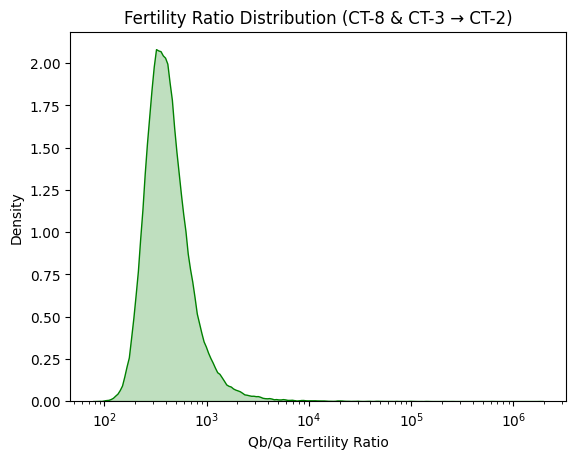

In [19]:
np.random.seed(17)
# Flux ordered using CT-8.2 and CT-3 to mix and form CT-2 with calculated fertilities.

# CT-8.2 and CT-3:
flux_4 = df.loc[3, 'Source_Area'] * CT_4_samples
flux_8 = df.loc[7, 'Source_Area'] * CT_8_samples
i5 = np.where(flux_8 > flux_4)
CT_8_ordered = CT_8_samples[i5]

# CT-3 is independent - no flux ordering needed
CT_3_ordered = CT_3_samples

CT_8_resampled = np.random.choice(CT_8_ordered, size=number_samples, replace=True)
CT_3_resampled = np.random.choice(CT_3_ordered, size=number_samples, replace=True)

print("Modeled Erosion Rates based on monte carlo simulations flux ordered")
print("CT-8 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_8_samples), np.std(CT_8_samples)))
print("CT-3 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples), np.std(CT_3_samples)))

# Calculating the fertilities for 8, 3 to 9
A_a = df.loc[7, 'Source_Area']          # CT-8 source area
P_a = df.loc[7, 'Surface_Production_Rate']  # CT-8 production rate
E_a = CT_8_samples

A_b = df.loc[2, 'Source_Area']          # CT-3 source area
P_b = df.loc[2, 'Surface_Production_Rate']  # CT-3 production rate
E_b = CT_3_samples

A_c = df.loc[1, 'Source_Area']          # CT-2 source area
P_c = df.loc[1, 'Surface_Production_Rate']  # CT-2 production rate
E_c = CT_2_samples

Q = (P_c * E_a * A_a - P_a * E_c * A_a) / (P_b * E_c * A_b - P_c * E_b * A_b)
i_f2 = np.where(Q > 0)

plt.figure()
sns.kdeplot(Q[i_f2], bw_adjust=.5, fill=True, color="green", log_scale=True)
plt.xlabel("Qb/Qa Fertility Ratio")
plt.ylabel("Density")
plt.title("Fertility Ratio Distribution (CT-8 & CT-3 → CT-2)")

print("Qb/Qa Fertility Ratio (mean, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.mean(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))
print("Qb/Qa Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(
    np.median(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))

In [ ]:
# subwatershed erosion rates that are flux ordered 
number_samples = 100000

CT_1_samples = np.random.normal(ER[0], ERU[0], number_samples)
CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)

CT_7_samples = np.random.normal(ER[6], ERU[6], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)

CT_2_samples = np.random.normal(ER[1], ERU[1], number_samples)
CT_3_samples = np.random.normal(ER[2], ERU[2], number_samples)

# Fluxes
flux_1 = WA[0] * CT_1_samples
flux_2 = WA[1] * CT_2_samples
flux_3 = WA[2] * CT_3_samples
flux_4 = WA[3] * CT_4_samples
flux_5 = WA[4] * CT_5_samples
flux_6 = WA[5] * CT_6_samples
flux_7 = WA[6] * CT_7_samples

# flux ordering
i1 = np.where(flux_5 > flux_7)
i2 = np.where(flux_6 > flux_1)
i3 = np.where(flux_7 < flux_5)
i4 = np.where(flux_1 < flux_6)
i5 = np.where(flux_2 > flux_4)

# Ordered fluxes
CT_1_ordered = CT_1_samples[i4]
CT_2_ordered = CT_2_samples[i5]
CT_5_ordered = CT_5_samples[i1]
CT_6_ordered = CT_6_samples[i2]
CT_7_ordered = CT_7_samples[i3]

# Resampling
CT_1_resampled = np.random.choice(CT_1_ordered, size = number_samples, replace = True)
CT_2_resampled = np.random.choice(CT_2_ordered, size = number_samples, replace = True)
CT_5_resampled = np.random.choice(CT_5_ordered, size = number_samples, replace = True)
CT_6_resampled = np.random.choice(CT_6_ordered, size = number_samples, replace = True)
CT_7_resampled = np.random.choice(CT_7_ordered, size = number_samples, replace = True)

# calculating the fertilities
# CT-1

# CT-2
A_a2 = WA[3]
E_a2 = CT_4_samples

A_b2 = WA[1]
E_b2 = CT_2_samples

# CT-5
A_a5 = WA[6]
E_a5 = CT_7_resampled

A_b5 = WA[4]
E_b5 = CT_5_resampled

# CT-6
A_a6 = WA[0]
E_a6 = CT_1_resampled

A_b6 = WA[5]
E_b6 = CT_6_resampled

# CT-7

# subwatershed erossion rate equation
ER_Sub2 = ((A_b2*E_b2) - (A_a2*E_a2)) / (A_b2-A_a2)
ER_Sub5 = ((A_b5*E_b5) - (A_a5*E_a5)) / (A_b5-A_a5)
ER_Sub6 = ((A_b6*E_b6) - (A_a6*E_a6)) / (A_b6-A_a6)


i_f2 = np.where(ER_Sub > 0)

print("CT-5 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples), np.std(CT_5_samples)))
print("CT-6 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples), np.std(CT_6_samples)))
sns.kdeplot(ER_Sub5[i_f2], bw_adjust=.5, fill=True, color="green", log_scale = True)
print("Subwatershed Erosion Rate 2: {0:6.4f} ± {1:6.4f}".format(np.mean(ER_Sub2[i_f2]), np.std(ER_Sub2[i_f2])))
print("Subwatershed Erosion Rate 5: {0:6.4f} ± {1:6.4f}".format(np.mean(ER_Sub5[i_f2]), np.std(ER_Sub5[i_f2])))
print("Subwatershed Erosion Rate 6: {0:6.4f} ± {1:6.4f}".format(np.mean(ER_Sub6[i_f2]), np.std(ER_Sub6[i_f2])))
print("Subwatershed Erosion Rate 1: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_1_samples[i_f2]), np.std(CT_1_samples[i_f2])))
print("Subwatershed Erosion Rate 7: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_7_samples[i_f2]), np.std(CT_7_samples[i_f2])))
print("Subwatershed Erosion Rate 3: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples[i_f2]), np.std(CT_3_samples[i_f2])))


In [ ]:
# We now have sub-samples from CT-5 and CT-6, which reflect the appropriate ordering.  
#  These get used to determine success ratio of CT-5 + CT-6 producing CT-4:

total_upstream_flux = np.random.choice(flux_5[i1], size=number_samples, replace=True) + np.random.choice(flux_6[i2], size=number_samples, replace = True)
CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)
flux_4 = WA[3] * CT_4_samples

i3 = np.where(flux_4 >= total_upstream_flux)

sns.kdeplot(total_upstream_flux, bw_adjust=.5, fill=True, color="blue")
sns.kdeplot(flux_4, bw_adjust=.5, fill=True, color="green")

print("Success Fraction of Samples: {0:6.4f}".format(i3[0].size / number_samples))
print("CT-4: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_4_samples[i3]), np.std(CT_4_samples[i3])))

In [ ]:
# Quartz fertility calculation for the CT-4, 5, 6 pair:

# basin b will be CT-6
# basin a will be CT-5

CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)
CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)

A_a = WA[4]
P_a = PR[4]
E_a = CT_5_samples

A_b = WA[5]
P_b = PR[5]
E_b = CT_6_samples

A_c = WA[3]
P_c = PR[3]
E_c = CT_4_samples

# Ensure proper ordering of samples:

i_f1 = np.where(np.logical_or(np.logical_and(CT_4_samples < CT_5_samples, CT_4_samples > CT_6_samples),np.logical_and(CT_4_samples > CT_5_samples, CT_4_samples < CT_6_samples)))

print("Success ratio: {0:6.4f}".format(i_f1[0].size/number_samples))

# Calculate fertility ratios using correctly ordered samples:

Q1 = ( P_c * E_a * A_a - P_a * E_c * A_a ) / (P_b * E_c * A_b - P_c * E_b * A_b)

i_f2 = np.where(Q1 > 0)

sns.kdeplot(Q1[i_f2], bw_adjust=.5, fill=True, color="green", log_scale=True)
print("Fertility Ratio: {0:6.4f} ± {1:6.4f}".format(np.mean(Q1[i_f2]), np.std(Q1[i_f2])))
print("Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Q1[i_f2]), np.percentile(Q1[i_f2], 75), np.percentile(Q1[i_f2], 25)))
print(np.median(Q1[i_f2]))

In [ ]:
# CT-4, CT-3 to CT-2, scenario 1: flux is properly represented by CT-4:

canyon_erosion_rate = 20.34
canyon_erosion_rate_uncertainty = 0.13 * canyon_erosion_rate
canyon_area = 1056.15

CT_canyon_samples = np.random.normal(canyon_erosion_rate, canyon_erosion_rate_uncertainty, number_samples)

flux_4_s1 = np.random.choice(CT_4_samples, size = number_samples, replace = True) * WA[3]
CT_2_samples = np.random.normal(ER[1], ERU[1], number_samples)

flux_3 = CT_canyon_samples * canyon_area
flux_2 = CT_2_samples * WA[1]

i5 = np.where(flux_2 > (flux_3 + flux_4_s1))

print("Success fraction: {0:6.4f}".format(i5[0].size / number_samples))
print("CT-2: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_2_samples[i5]), np.std(CT_2_samples[i5])))
print("CT-Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_canyon_samples[i5]), np.std(CT_canyon_samples[i5])))
sns.kdeplot(CT_2_samples[i5], bw_adjust=.5, fill=True, color="green")
sns.kdeplot(CT_2_samples, bw_adjust=.5, fill=True, color="blue")

In [ ]:
# Quartz fertility calculation for the CT-4, 5, 6 pair, scenario 1:

# basin b will be canyon_samples
# basin a will be CT-4

CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)

# Ensure proper ordering of samples:

i_f2 = np.where(np.logical_or(np.logical_and(CT_2_samples < CT_4_samples, CT_2_samples > CT_canyon_samples),np.logical_and(CT_2_samples > CT_4_samples, CT_2_samples < CT_canyon_samples)))

sns.kdeplot(CT_2_samples, fill = True, bw_adjust = 0.5, color = 'red')
sns.kdeplot(CT_4_samples, fill = True, bw_adjust = 0.5, color = 'green')
sns.kdeplot(CT_canyon_samples, fill = True, bw_adjust = 0.5, color = 'blue')
print("Success ratio: {0:6.4f}".format(i_f2[0].size/number_samples))


#sns.kdeplot(Q2, bw_adjust=.5, fill=True, color="green", log_scale=True)

In [ ]:
# CT-4, CT-3 to CT-2, scenario 2: flux is properly represented by weighted sum of CT-5 and CT-6

flux_4_s2 = np.random.choice(CT_5_samples[i1], size = number_samples, replace = True) * WA[4] + np.random.choice(CT_6_samples[i2], size = number_samples, replace = True) * WA[5]

i6 = np.where(flux_2 > (flux_3 + flux_4_s2))

print("Success fraction: {0:6.4f}".format(i6[0].size / number_samples))
sns.kdeplot(CT_2_samples[i6], bw_adjust=.5, fill=True, color="green")
sns.kdeplot(CT_2_samples, bw_adjust=.5, fill=True, color="blue")

In [ ]:
# Quartz fertility calculation for the CT-4, 5, 6 pair, scenario 2:

# basin b will be canyon_samples
# basin a will be sediment flux from area-weighted average of CT-5 and CT-6:

CT_5_6_samples = (CT_5_samples * WA[4] + CT_6_samples * WA[5]) / (WA[4] + WA[5])

A_a = (WA[4] + WA[5])
P_a = PR[3]
E_a = CT_5_6_samples

A_c = WA[1]
P_c = PR[1]
E_c = CT_2_samples

A_b = canyon_area
P_b = 5.080075
E_b = CT_canyon_samples

# Ensure proper ordering of samples:

i_f3 = np.where(np.logical_or(np.logical_and(CT_2_samples < CT_5_6_samples, CT_2_samples > CT_canyon_samples),np.logical_and(CT_2_samples > CT_5_6_samples, CT_2_samples < CT_canyon_samples)))

plt.figure()
sns.kdeplot(CT_2_samples, fill = True, bw_adjust = 0.5, color = 'red')
sns.kdeplot(CT_5_6_samples, fill = True, bw_adjust = 0.5, color = 'green')
sns.kdeplot(CT_canyon_samples, fill = True, bw_adjust = 0.5, color = 'blue')
print("Success ratio: {0:6.4f}".format(i_f3[0].size/number_samples))

# Calculate fertility ratios using correctly ordered samples:

Q3 = ( P_c * E_a * A_a - P_a * E_c * A_a ) / (P_b * E_c * A_b - P_c * E_b * A_b)

plt.figure()
i_f4 = np.where(np.logical_and(Q3 > 0, Q3 < 100))
sns.kdeplot(Q3[i_f4], gridsize = 5000, bw_adjust=.5, fill=True, color="green")
plt.xlim([0, 100])
i_f = np.where(Q3 > 0)

print("Fertility Ratio: {0:6.4f} ± {1:6.4f}".format(np.mean(Q3[i_f]), np.std(Q3[i_f])))
print("Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Q3[i_f]), np.percentile(Q3[i_f], 75), np.percentile(Q3[i_f], 25)))


In [ ]:
data = pd.read_excel('CT-1-7_ZrUPb_datasheets.xlsx', sheet_name = 'ZrUPb')

CT_4_data = data[data["Sample_ID"] == 'CT-4']
CT_5_data = data[data["Sample_ID"] == 'CT-5']
CT_6_data = data[data["Sample_ID"] == 'CT-6']

length_CT_4 = CT_4_data['BestAge'].values.size
length_CT_5 = CT_5_data['BestAge'].values.size
length_CT_6 = CT_6_data['BestAge'].values.size

CT_5_index = np.arange(0,length_CT_5)
CT_6_index = np.arange(0,length_CT_6)

In [ ]:
# Next, we have good evidence that sample CT-4 is not mixed.  Thus, we need to make a synthetic sample
#   at the location of CT-4 that mixes CT-5 and CT-6.  Here's how we will do this:

targeted_fertility_ratio = 0.1 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_1.xlsx', index=False)

# Targeted Fertility Ratios

In [ ]:
targeted_fertility_ratio = 0.5 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_2.xlsx', index=False)v

In [ ]:
targeted_fertility_ratio = 1 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_3.xlsx', index=False)

In [ ]:
targeted_fertility_ratio = 5 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_4.xlsx', index=False)

In [ ]:
targeted_fertility_ratio = 10 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_5.xlsx', index=False)

# Calculate 5 cases of CT-4synthetic mixture modeling for Zr

In [ ]:
#Case 1
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case1_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZa_Zb), two_sig_a))
print("")

#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquartile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 2
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case2_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc

# # filter out zeros
# nonzero_indices_a = np.where(Za_Zc !=0)
# nonzero_indices_b = np.where(Zb_Zc !=0)
# Za_Zc = Za_Zc[nonzero_indices_a]
# Zb_Zc = Zb_Zc[nonzero_indices_b]

# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 3
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case3_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 4
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case4_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 5
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case5_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


# Calculate 5 cases of CT-4synthetic mixture modeling for Zr Child CT-2

In [ ]:
#Case 1
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case1_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

#sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
#sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
#sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a)) 
print("")

# Plot results
#CT-canyon/CT-4
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-Canyon/CT-4")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=False)
print("CT-4/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 2
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case2_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=True)
sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=True)
sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=True)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=False)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=False)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 3
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case3_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

# sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
# sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
# sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=False)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=False)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
# Case 4
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case4_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

#sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
#sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
#sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


In [ ]:
#Case 5
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case5_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

#sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
#sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
#sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# order the rates
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


# Calculating Fertility Ratios 5,6 to 4

In [ ]:
import csv

filename = 'ct-4_mix_coeffs_all.csv'

wct_5, wct_6 = [], []

with open(filename, 'r') as file:
    csvfile = csv.reader(file)
    next(csvfile)
    for row in csvfile:
        wct_5.append(float(row[0]))
        wct_6.append(float(row[1]))

ratio = np.array(wct_5) / np.array(wct_6)

WCT_5 = 0.257
WCT_6 = 0.743

num = 10000

ratio = ratio[ratio != 0]
ratio = np.random.choice(ratio, replace = True, size = num)


ER_CT6 = np.random.normal(ER[5], ERU[5], num) # ct-5 erosion rates 100000
ER_CT5 = np.random.normal(ER[4], ERU[4], num) # ct-6 erosion rates 100000

ZA_ZB = ratio/WCT_6 * ER_CT6*WA[5] / (ER_CT5*WA[4])

print(np.median(1/ZA_ZB))
print("ZB_ZA Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(1/ZA_ZB), np.percentile(1/ZA_ZB, 75), np.percentile(1/ZA_ZB, 25)))

In [ ]:
print("ZA_ZB Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZA_ZB), np.percentile(ZA_ZB, 75), np.percentile(ZA_ZB, 25)))

# Calculating Feritlity Ratios 5,6,Canyon to

In [ ]:
import csv

filename = 'ct-2_mix_coeffs_all.csv'

wct_5, wct_6, wcanyon = [], [], []

with open(filename, 'r') as file:
    csvfile = csv.reader(file)
    next(csvfile)
    for row in csvfile:
        wct_5.append(float(row[0]))
        wct_6.append(float(row[1]))
        wcanyon.append(float(row[2]))


CA_ER = canyon_erosion_rate
CA_ERU = canyon_erosion_rate_uncertainty
CA_WA = canyon_area    

# WCT_5 = 0.398
# WCT_6 = 0.453
# WCT_Canyon = 0.149

num = 10000

# random sampling for the zr weighst
wct_5_sampled = np.random.choice(wct_5, size=num, replace=True)
wct_6_sampled = np.random.choice(wct_6, size=num, replace=True)
wcanyon_sampled = np.random.choice(wcanyon, size=num, replace=True)

# random sampling for the ERs
ER_CT6 = np.random.normal(ER[5], ERU[5], num) # ct-5 erosion rates 100000
ER_CT5 = np.random.normal(ER[4], ERU[4], num) # ct-6 erosion rates 100000
ER_CT_Canyon = np.random.normal(CA_ER, CA_ERU, num) # ct-canyon erosion rates 100000


ZA_ZD = wct_5_sampled * ((ER[4]*WA[4]) + (ER[5]*WA[5]) + (CA_ER*CA_WA)) / (ER[4]*WA[4])
ZB_ZD = wct_6_sampled * ((ER[4]*WA[4]) + (ER[5]*WA[5]) + (CA_ER*CA_WA)) / (ER[5]*WA[5])
ZC_ZD = wcanyon_sampled * ((ER[4]*WA[4]) + (ER[5]*WA[5]) + (CA_ER*CA_WA)) / (CA_ER*CA_WA)

ZA_ZB = ZA_ZD / ZB_ZD
ZB_ZA = ZB_ZD / ZA_ZD
ZA_ZC = ZA_ZD / ZC_ZD
ZC_ZA = ZC_ZD / ZA_ZD
ZB_ZC = ZB_ZD / ZC_ZD
ZC_ZB = ZC_ZD / ZB_ZD

print(np.median(ZA_ZD))
print(np.median(ZB_ZD))
print(np.median(ZC_ZD))
print()
print(('A_B'),np.median(ZA_ZB))
print(('A_C'),np.median(ZA_ZC))
print(('B_A'),np.median(ZB_ZA))
print(('C_A'),np.median(ZC_ZA))
print(('C_B'),np.median(ZC_ZB))
print()
print("ZB_ZA Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZB_ZA), np.percentile(ZB_ZA, 75), np.percentile(ZB_ZA, 25)))
print("ZA_ZB Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZA_ZB), np.percentile(ZA_ZB, 75), np.percentile(ZA_ZB, 25)))
print("ZA_ZC Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZA_ZC), np.percentile(ZA_ZC, 75), np.percentile(ZA_ZC, 25)))
print("ZC_ZA Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZC_ZA), np.percentile(ZC_ZA, 75), np.percentile(ZC_ZA, 25)))
print("ZB_ZC Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZB_ZC), np.percentile(ZB_ZC, 75), np.percentile(ZB_ZC, 25)))
print("ZC_ZB Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZC_ZB), np.percentile(ZC_ZB, 75), np.percentile(ZC_ZB, 25)))
